In [1]:
!pip install scipy
!pip install seaborn
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score



In [3]:
# Load the dataset
data = pd.read_csv('credit.csv')




In [5]:
# Map 'Class' to binary
data['Class_code'] = data['Class'].map({'Good': 0, 'Bad': 1})  # 0 for Good, 1 for Bad

# Convert the target column to numeric (assuming 'Class' is the target)
# 0 for 'Good' and 1 for 'Bad'
data['Class_code'] = data['Class'].map({'Good': 0, 'Bad': 1})

# Drop the 'Class' column 
X = data.drop(columns=['Class', 'Class_code'])
y = data['Class_code']

# Initialize lists to store significant variables
significant_vars =['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'Age',
 'ForeignWorker',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Radio.Television',
 'Purpose.Education',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.4.to.7',
 'Personal.Female.NotSingle',
 'Personal.Male.Single',
 'OtherDebtorsGuarantors.CoApplicant',
 'Property.RealEstate',
 'Property.Unknown',
 'OtherInstallmentPlans.Bank',
 'OtherInstallmentPlans.None',
 'Housing.Rent',
 'Housing.Own',
 'Housing.ForFree']


# Check the distribution of the target variable
print("Target distribution:")
print(data['Class_code'].value_counts())

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for consistency in feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df= X_scaled_df[significant_vars]

# Display scaled features
print(X_scaled_df.head())

# Data is now preprocessed and ready for model training

######################################


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Define a range of k values to test
k_values = [1,3,5,10]  # Testing k from 1 to 20
p_values =[.5]


Target distribution:
Class_code
0    700
1    300
Name: count, dtype: int64
   Duration    Amount  InstallmentRatePercentage       Age  ForeignWorker  \
0 -1.236478 -0.745131                   0.918477  2.766456       0.196014   
1  2.248194  0.949817                  -0.870183 -1.191404       0.196014   
2 -0.738668 -0.416562                  -0.870183  1.183312       0.196014   
3  1.750384  1.634247                  -0.870183  0.831502       0.196014   
4  0.256953  0.566664                   0.024147  1.535122       0.196014   

   CheckingAccountStatus.lt.0  CheckingAccountStatus.0.to.200  \
0                    1.627770                       -0.606621   
1                   -0.614337                        1.648476   
2                   -0.614337                       -0.606621   
3                    1.627770                       -0.606621   
4                    1.627770                       -0.606621   

   CheckingAccountStatus.none  CreditHistory.NoCredit.AllPaid  \
0    

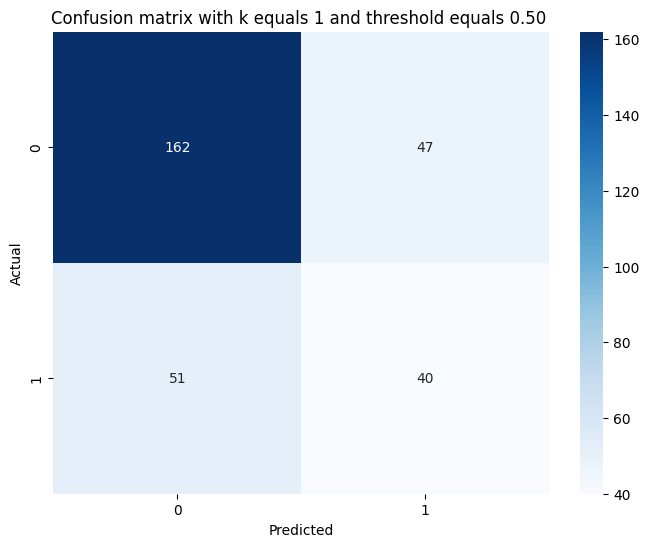

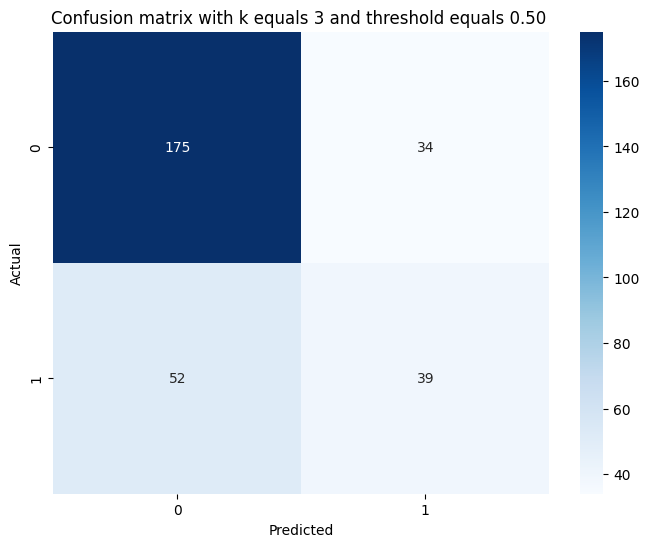

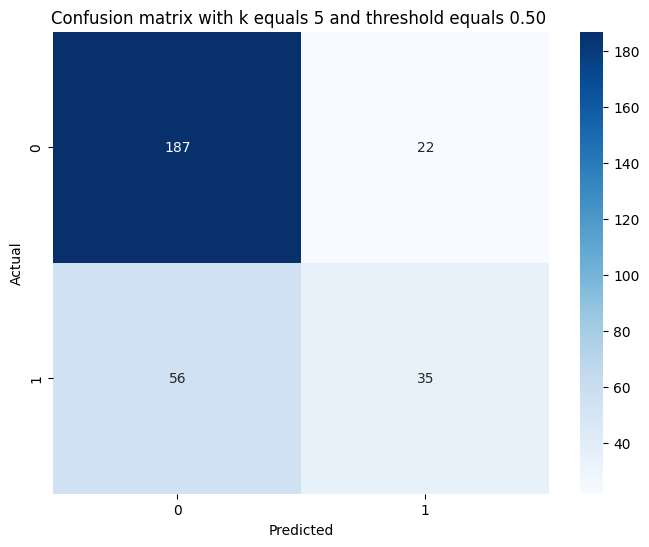

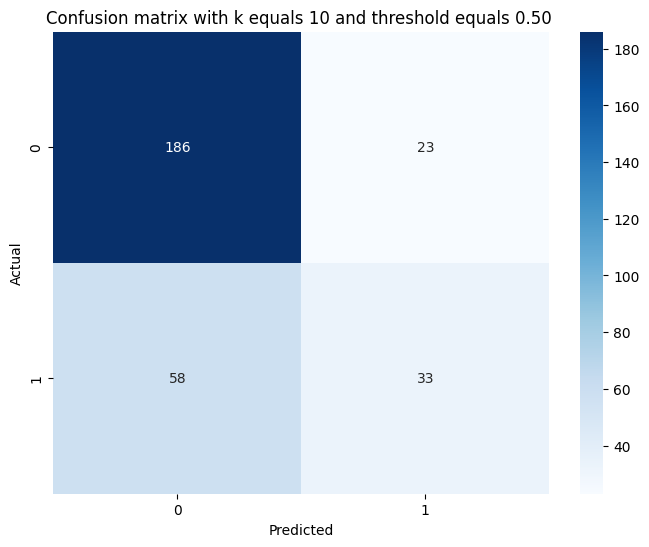

In [6]:
# Store results for each k
results = []

for k in k_values:
    for prob_threshold in p_values:
    # k-Nearest Neighbors model
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
    
    # Predictions with k-NN
        y_prob = knn_model.predict_proba(X_test)[:,1]
    
    # Use a fixed threshold for binary classification
       
        y_pred = (y_prob >= prob_threshold).astype(int)
    
    # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix and ROC AUC
        conf_matrix = confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion matrix with k equals {k:.0f} and threshold equals {prob_threshold:.2f} ")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
  #To calculate the TPR and FPR
        TN, FP, FN, TP = conf_matrix.ravel()

  # Calculating TPR and FPR
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)

  # Display the results
   

    # Plotting the confusion matrix
  
    
    # Collecting results
        results.append({
            'k': k,
            'Accuracy': accuracy,
            'AUC': auc
         })

    

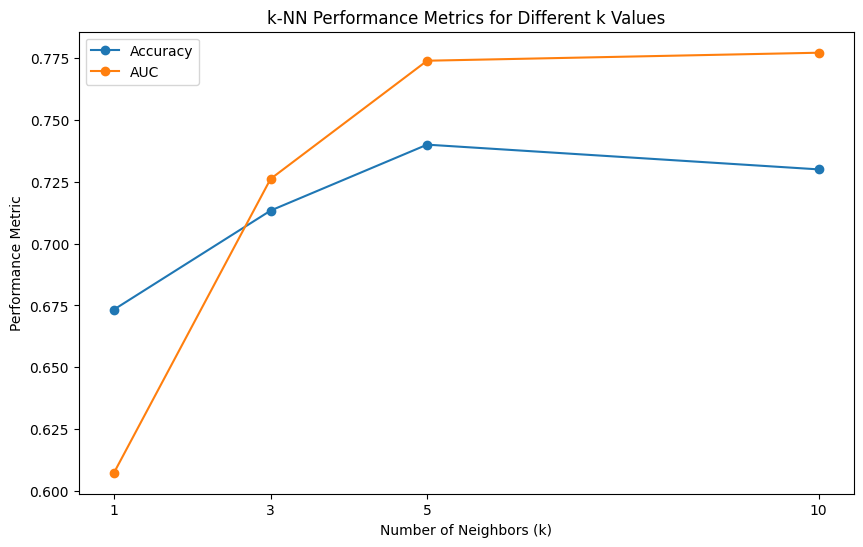

    k  Accuracy       AUC
0   1  0.673333  0.607340
1   3  0.713333  0.726142
2   5  0.740000  0.773937
3  10  0.730000  0.777170


In [7]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['k'], results_df['AUC'], marker='o', label='AUC')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Performance Metric')
plt.title('k-NN Performance Metrics for Different k Values')
plt.legend()
plt.show()

print(results_df)